1. Data Import & Basic Checks

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import joblib

In [ ]:
df = pd.read_excel(r'C:\Users\pabath induwara\Documents\Projects\Subclinical Mastitis\datasheet.xlsx')

print("Data Shape:", df.shape)
df.head()

Data Shape: (881, 27)


,Identification No,Sample No,Breed,Lac. No.,DIM( Days In Milk),Avg(7 days). Daily MY( L ),Test day MY (L ),Kg. milk 305 ( Kg ),Peak DIM MM ( Days),Fat (%),...,Lactose (%),SCC (103cells/ml),CMT(Score),Mastitis in Current Lactation,DIM when diagnosed,Date of Diagnosed,Mastitis in Previous Lactation,Date of Diagnosed.1,Carving Date,Sample Collection Date
0,245,217,Jersey * Friesian,6,167,12.54,NaN,3465,30,0.65,...,3.52,412,NaN,NaN,NaN,NaT,Yes,2021-10-21,2022-07-07,2022-12-21
1,341,185,Jersey * Friesian,7,125,15.80,17.3,4380,20,1.23,...,3.62,52,NaN,Yes,96.0,2022-11-22,NaN,NaT,2022-08-18,2022-12-21
2,427,61,Jersey * Friesian,7,150,13.20,16.4,4112,36,3.25,...,3.94,40,NaN,NaN,NaN,NaT,NaN,NaT,2022-07-24,2022-12-21
3,487,239,Jersey * Friesian,4,133,18.90,NaN,5707,70,0.51,...,3.26,131,NaN,Yes,196.0,2023-02-22,NaN,NaT,2022-08-10,2022-12-21
4,488,111,Jersey * Friesian,4,116,18.14,21.5,4765,45,0.99,...,4.07,543,NaN,NaN,NaN,NaT,Yes,2021-09-08,2022-08-27,2022-12-21


In [114]:
print(df.info())
print("\nMissing Values Per Column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Identification No                881 non-null    int64         
 1   Sample No                        881 non-null    int64         
 2   Breed                            881 non-null    object        
 3   Lac. No.                         881 non-null    int64         
 4   DIM( Days In Milk)               881 non-null    int64         
 5   Avg(7 days). Daily MY( L )       881 non-null    float64       
 6   Test day MY (L )                 830 non-null    float64       
 7   Kg. milk 305 ( Kg )              881 non-null    int64         
 8   Peak DIM MM ( Days)              881 non-null    int64         
 9   Fat (%)                          881 non-null    float64       
 10  SNF (%)                          881 non-null    float64      

2. Define Subclinical Mastitis Using SCC

In [115]:
THRESHOLD = 200
df['Subclinical_Mastitis'] = np.where(df['SCC (103cells/ml)'] > THRESHOLD, 1, 0)

3. Incorporate CMT (Score)

In [116]:
cmt_dict = {
    0: 100,
    1: 300,
    2: 900,
    3: 2700,
    4: 8100
}

df['CMT(Score)'] = pd.to_numeric(df['CMT(Score)'], errors='coerce')

df['CMT_cellcount'] = df['CMT(Score)'].map(cmt_dict)

In [117]:
median_cmt = df['CMT_cellcount'].median()  
df['CMT_cellcount'].fillna(median_cmt, inplace=True)

C:\Users\pabath induwara\AppData\Local\Temp\ipykernel_29020\3281552023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CMT_cellcount'].fillna(median_cmt, inplace=True)


4. Feature Selection / Cleaning

In [118]:
drop_cols = [
    'Identification No',
    'Sample No',
    'SCC (103cells/ml)',      
    'Mastitis in Current Lactation',
    'Mastitis in Previous Lactation ',
    'CMT(Score)',            
    'DIM  when diagnosed',
    'Date of Diagnosed',
    'Date of Diagnosed.1',
    'Carving Date',
    'Sample Collection Date'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

In [119]:
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Breed', 'Lac. No.', 'DIM( Days In Milk)', 'Avg(7 days). Daily MY( L )', 'Test day MY (L )', 'Kg. milk 305 ( Kg )', 'Peak DIM MM ( Days)', 'Fat (%)', 'SNF (%)', 'Density ( Kg/ m3', 'Protein (%)', 'Conductivity (mS/cm)', 'pH', 'Freezing point (⁰C)', 'Salt (%)', 'Lactose (%)', 'Subclinical_Mastitis', 'CMT_cellcount']


In [120]:
df['Conductivity (mS/cm)'] = pd.to_numeric(df['Conductivity (mS/cm)'], errors='coerce')

In [121]:
df['Conductivity (mS/cm)'].fillna(df['Conductivity (mS/cm)'].mean(), inplace=True)
df['Test day MY (L )'].fillna(df['Test day MY (L )'].mean(), inplace=True)
df['Freezing point (⁰C)'].fillna(df['Freezing point (⁰C)'].mean(), inplace=True)

C:\Users\pabath induwara\AppData\Local\Temp\ipykernel_29020\2242838023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Conductivity (mS/cm)'].fillna(df['Conductivity (mS/cm)'].mean(), inplace=True)
C:\Users\pabath induwara\AppData\Local\Temp\ipykernel_29020\2242838023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

5. Data Visualization (EDA)

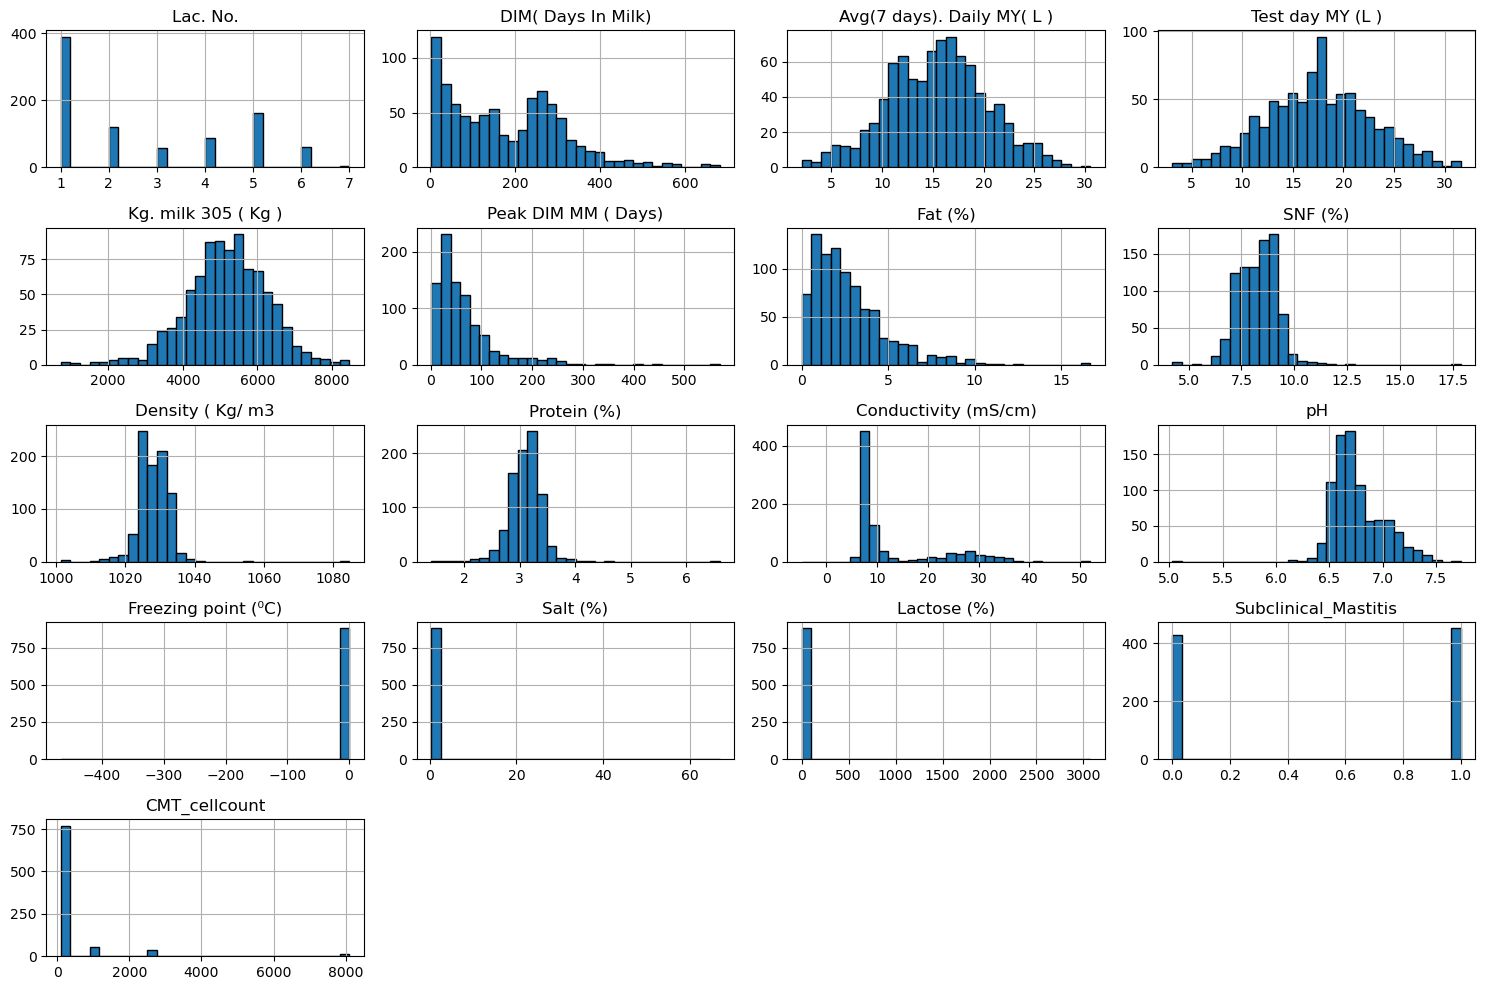

In [124]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

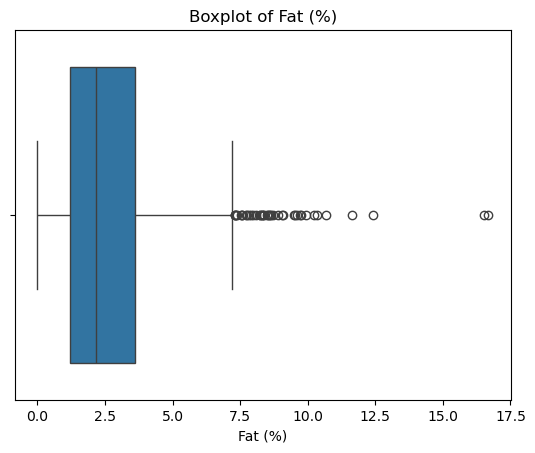

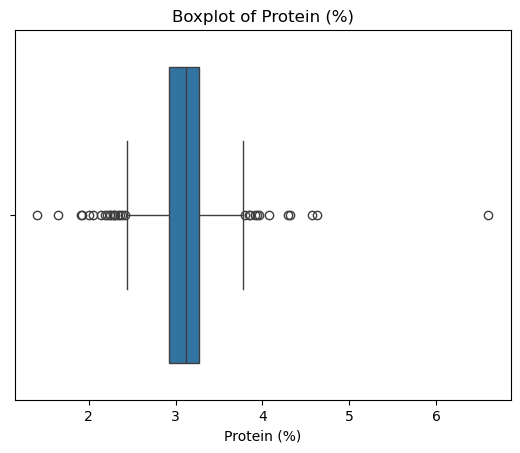

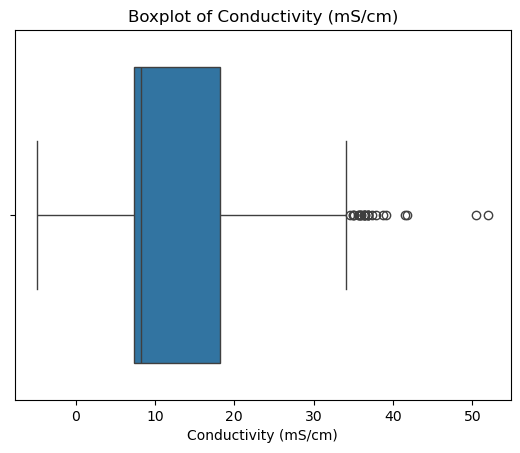

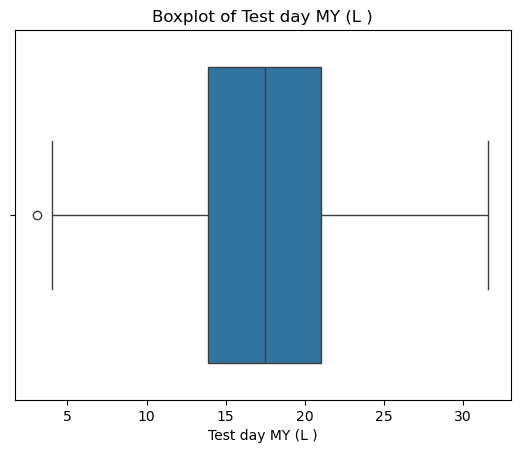

In [125]:
for col in ['Fat (%)', 'Protein (%)', 'Conductivity (mS/cm)', 'Test day MY (L )']:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

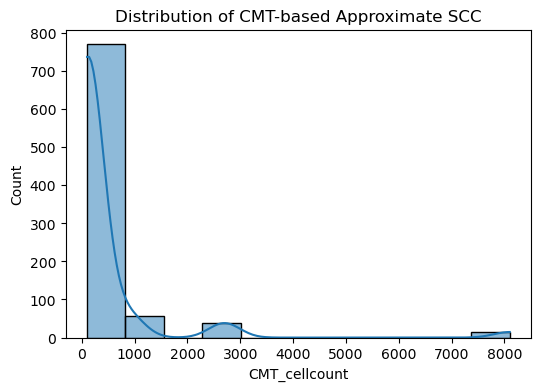

In [126]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='CMT_cellcount', kde=True)
plt.title("Distribution of CMT-based Approximate SCC")
plt.show()

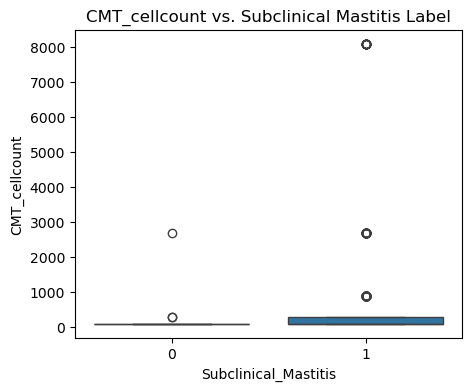

In [127]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Subclinical_Mastitis', y='CMT_cellcount', data=df)
plt.title("CMT_cellcount vs. Subclinical Mastitis Label")
plt.show()

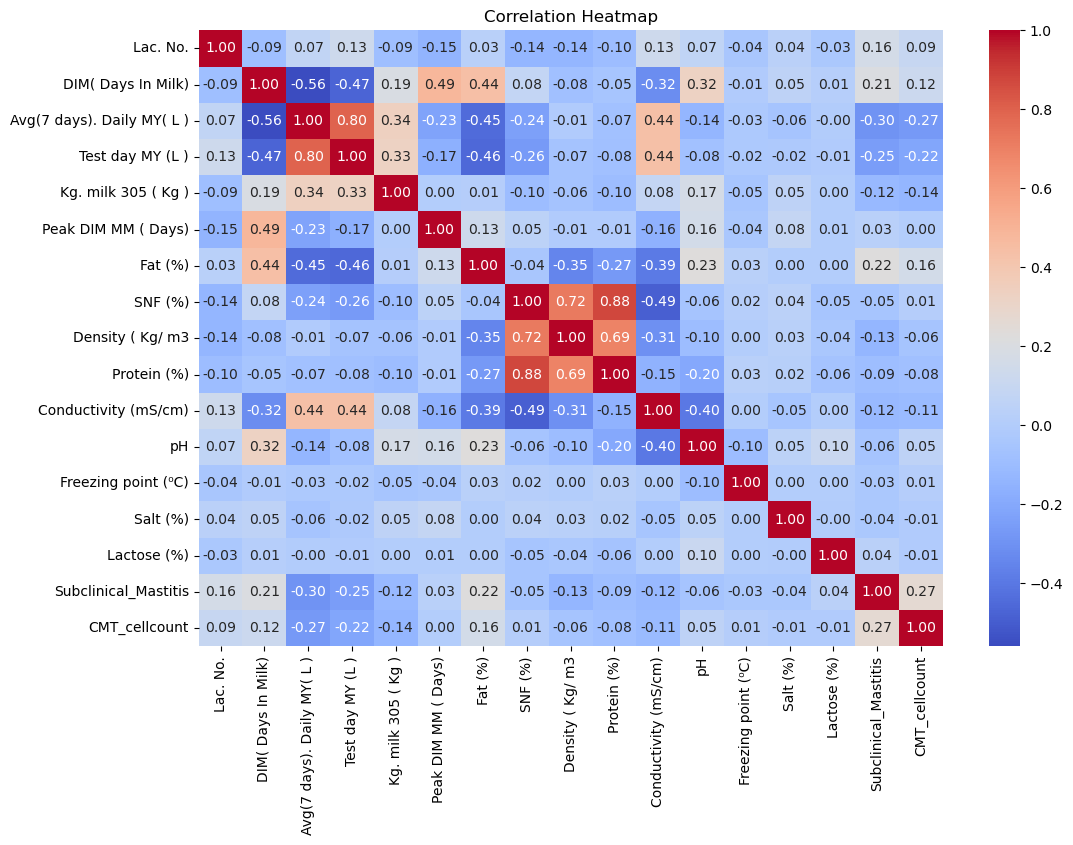

In [128]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

6. Feature Engineering

In [129]:
y = df['Subclinical_Mastitis']

X = df.drop(columns=['Subclinical_Mastitis'], errors='ignore')

In [130]:
if 'Breed' in X.columns and X['Breed'].dtype == object:
    X = pd.get_dummies(X, columns=['Breed'], drop_first=True)

7. Train/Test Split & Scaling

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  
)

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

8. Model Training & Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ("SVM (RBF)", SVC(probability=True, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42))
]

results = []

for name, model in models:
   
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC": auc
    })

C:\Users\pabath induwara\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [16:15:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


9. Compare Models

In [134]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="AUC", ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score       AUC
4    Gradient Boosting  0.757062   0.815789  0.681319  0.742515  0.837337
1        Random Forest  0.779661   0.833333  0.714286  0.769231  0.837082
3            SVM (RBF)  0.779661   0.817073  0.736264  0.774566  0.836826
2              XGBoost  0.762712   0.795181  0.725275  0.758621  0.833759
0  Logistic Regression  0.757062   0.785714  0.725275  0.754286  0.828520


C:\Users\pabath induwara\AppData\Local\Temp\ipykernel_29020\919331441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AUC", y="Model", data=results_df, orient='h', palette='viridis')


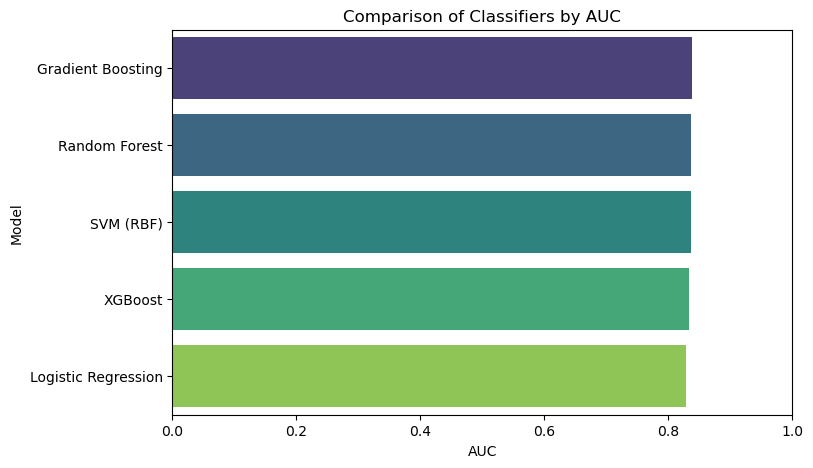

In [135]:
plt.figure(figsize=(8,5))
sns.barplot(x="AUC", y="Model", data=results_df, orient='h', palette='viridis')
plt.title("Comparison of Classifiers by AUC")
plt.xlim([0,1])
plt.show()

10. Selecting the Best Model & Saving It

In [ ]:
best_model_name = results_df.iloc[0]["Model"]
print("Best model is:", best_model_name)

model_dict = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM (RBF)": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

best_model = model_dict[best_model_name]
best_model.fit(X_train_scaled, y_train)

import joblib
joblib.dump(best_model, "best_subclinical_mastitis_model.pkl")
joblib.dump(scaler, "scaler.pkl")  

Best model is: Gradient Boosting


['scaler.pkl']

11. Predicting on New Data

In [146]:
import pandas as pd
import joblib


loaded_clf = joblib.load("best_subclinical_mastitis_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

new_data = pd.DataFrame({
    'Lac. No.': [2],
    'DIM( Days In Milk)': [50],
    'Avg(7 days). Daily MY( L )': [25.0],
    'Test day MY (L )': [25.5],
    'Kg. milk 305 ( Kg )': [7000],
    'Peak DIM MM ( Days)': [60],
    'Fat (%)': [3.5],
    'SNF (%)': [8.7],
    'Density ( Kg/ m3': [1.028],
    'Protein (%)': [3.1],
    'Conductivity (mS/cm)': [5.2],
    'pH': [6.6],
    'Freezing point (⁰C)': [-0.56],
    'Salt (%)': [0.7],
    'Lactose (%)': [4.7],
    'CMT_cellcount': [900],   
    'Breed_Jersey * Friesian': [0],
})

new_data_scaled = loaded_scaler.transform(new_data)

pred = loaded_clf.predict(new_data_scaled)

pred_proba = loaded_clf.predict_proba(new_data_scaled)
print("Prediction probabilities:", pred_proba)

Prediction probabilities: [[0.34491036 0.65508964]]


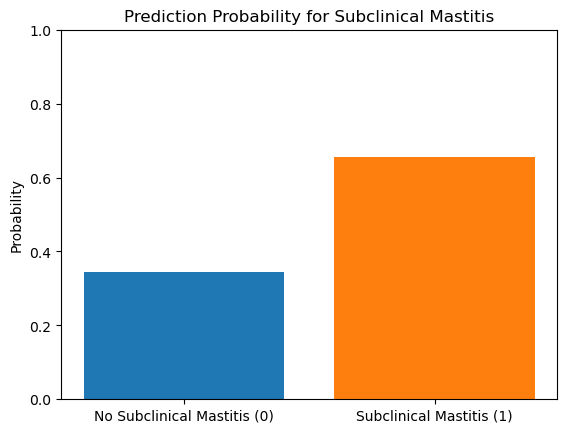

In [147]:
import matplotlib.pyplot as plt

proba = pred_proba[0]  

classes = ["No Subclinical Mastitis (0)", "Subclinical Mastitis (1)"]

plt.bar(classes, proba, color=['#1f77b4', '#ff7f0e']) 
plt.ylabel("Probability")
plt.title("Prediction Probability for Subclinical Mastitis")
plt.ylim([0, 1])  
plt.show()